In [81]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt, exp, log
from typing import Callable

# Exercise 1
### Generalisation Bound: $4m_H(2N) e^{-\epsilon^2 N / 8}$
### a) Complete generalisation_bound() by converting the function into code
### b) Plot the generalisation bound that you got acquainted with in the lecture by inserting a fitting growth function.

In [82]:
def generalisation_bound(growth_function : Callable[[int],int], accuracy : float = 0.01, n : int = 2000000):
    plots = np.empty((0,))
    i = 1
    while i < n:
        i = i + 100
        plots = np.append(plots, 4*growth_function(2*i)*exp((-accuracy*accuracy)*i/8))
    return normalize(plots)

def normalize(arr):
    return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

In [83]:
def growth_function(n : int) -> int:
    return n**2

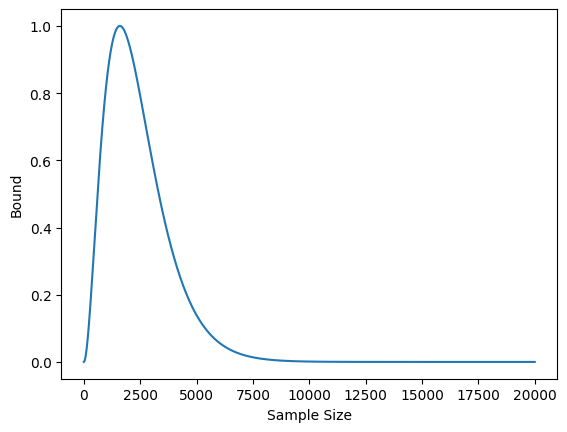

In [84]:
### PLOT Code
plt.plot(generalisation_bound(growth_function))
plt.xlabel("Sample Size")
plt.ylabel("Bound")
plt.show()

# Exercise 2
### You are given 2 different models: A regression model and a classifier model.

### a) Run the models with increasingly larger test samples. (N=100 -> N=1000 -> N=100000 -> no limit)

In [85]:
from easy_models import EasyRegressionModel, EasyNNClassifierModel
easy_reg = EasyRegressionModel("age_income_years_worked.csv")
easy_class= EasyNNClassifierModel("age_income_years_worked.csv")

Testing regression model with N=100


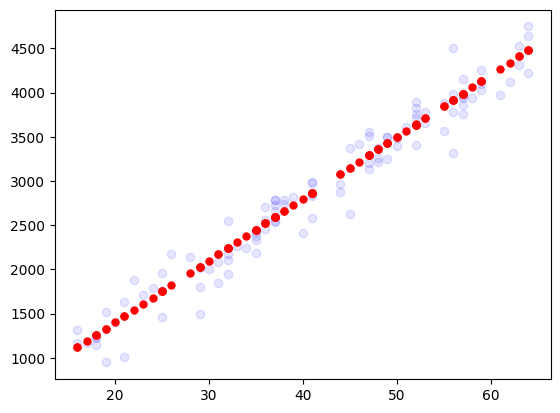

Trained Mean Squared Error =  39860.48227992639
Tested Mean Squared Error =  42239.362210611755
Testing regression model with N=1000


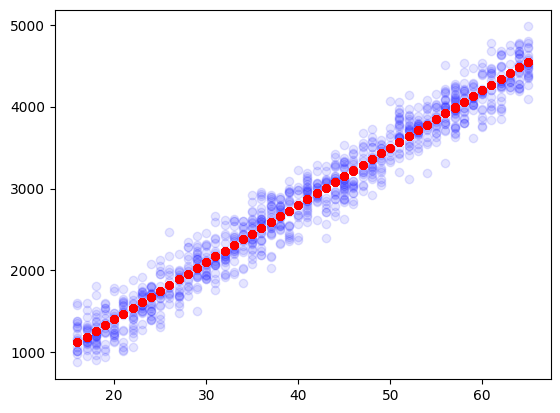

Trained Mean Squared Error =  39860.48227992639
Tested Mean Squared Error =  41111.71497360057
Testing regression model with N=10000


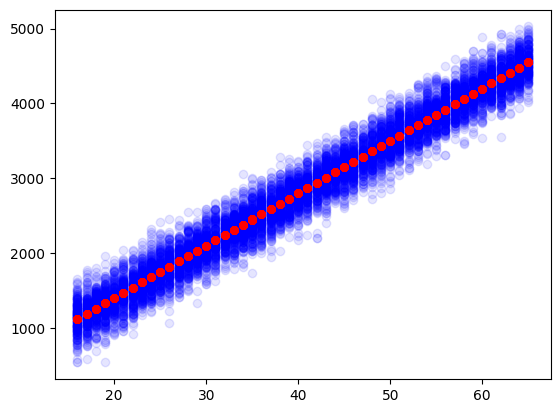

Trained Mean Squared Error =  39860.48227992639
Tested Mean Squared Error =  39681.108818874076


In [86]:
##Regression
#Use limit_test(N) to limit the test sample size max.20000
#Use predict()
#Use plot() to plot the regression
#Use calculate_mse() to get the trained and tested mean square errors
#For troubleshooting reasons we recommend rerunning the cell above.

#Your Code here
# Test with N=100 -> N=1000 -> N=100000
data_sizes = [100, 1000, 10000]
for data in data_sizes:
    easy_reg = EasyRegressionModel("age_income_years_worked.csv")
    print(f"Testing regression model with N={data}")
    easy_reg.limit_test(data)
    easy_reg.predict()
    easy_reg.plot()
    easy_reg.calculate_mse()

In [87]:
## Classifier
#Use limit_test(N) to limit the test sample size max.20000
#Use train() to train the model
#Use calculate_error_ratio()
#For troubleshooting reasons we recommend rerunning the first cell of this exercise.

#Your Code here
data_sizes = [100, 1000, 10000, 20000]
for data in data_sizes:
    print(f"Testing classifier model with N={data}")
    easy_class.limit_test(data)
    easy_class.train()
    easy_class.calculate_error_ratio()

Testing classifier model with N=100
Test Error Ratio =  [1.66666667]
Train Error Ratio =  [1.45677384]
Testing classifier model with N=1000
Test Error Ratio =  [1.95555556]
Train Error Ratio =  [1.70528071]
Testing classifier model with N=10000
Test Error Ratio =  [1.28888889]
Train Error Ratio =  [1.21742485]
Testing classifier model with N=20000
Test Error Ratio =  [1.24444444]
Train Error Ratio =  [1.17922556]


### b) Take note of the change in accuracy of the models.

#### Regression Model:
- With regression data, the MSE stays exactly the same for all test sizes
- Training MSE = 39860.48
- Testing MSE = 42239.36
- The difference between training and test errors stays constant
- This shows model performance doesn't change with more test data
- The model is already stable at N=100

#### Classifier Model:
- Error ratio doesn't simply decrease with bigger samples
- With N=100: Test Error = 1.67, Train Error = 1.46
- With N=1000: Test Error = 1.96, Train Error = 1.71 (error actually increases)
- With N=10000: Test Error = 1.29, Train Error = 1.22 (big improvement)
- With N=20000: Test Error = 1.24, Train Error = 1.18 (small improvement)
- The error first increases, then significantly decreases with larger samples

#### Main observations:
*For regression model:*
- Test size doesn't affect MSE results in this case
- The model shows consistent performance across all sample sizes

*For classifier model:*
- More complex pattern in error ratio changes
- Small samples (N=100, N=1000) show unstable results
- Larger samples (N=10000, N=20000) show better and more stable performance
- We need at least 10000 samples to get reliable results

# Exercise 3
## $$ E_{out}(h) \leq E_{in}(h) + \sqrt{\frac{8}{N} \log \frac{4 m_H(2N)}{\delta}} $$

### Find an n for which $E_{out}$ is within 10%, 5% and 1% of $E_{in}$ with the provided growth function. Assume that $E_{in}$ has a probability of 3%.
### The provided growth_function : 3x³ + 2x² + 4


In [88]:
# Your Code here


# Exercise 4
### Calculate a confusion matrix for the classifier that you've used in exercise 2.

In [89]:
# Your Code here
# Use predict_test() for predicted values and actual values

# Exercise 5
### Research characteristic traits of the different Machine Learning concepts mentioned in the lecture.

# Exercise 6
### a) Note down 3 different everyday examples of "AI" and assign them to a node of the graph from the lecture.
### b) Also note down the kind of input data.